In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("../data/raw/AAPL_stock.csv")
data.head()

,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2015-01-02,24.2885799407959,24.75733433246641,23.848705532925308,24.746225733732643,212818400
2,2015-01-05,23.60433578491211,24.137516414569966,23.417723496745833,24.057539235374563,257142000
3,2015-01-06,23.606550216674805,23.866475117609923,23.244430968171436,23.668754292631863,263188400
4,2015-01-07,23.937572479248047,24.037543101651647,23.70430543372708,23.8153846563686,160423600


# Step 2: Load historical stock data


In [3]:
data = yf.download('AAPL', start='2018-01-01', end='2024-06-01')
df = data[['Close']].copy()
df = df.rename(columns={'Close': 'y'})

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


# Step 3: Create lag features

In [4]:
for lag in range(1, 6):  # Using past 5 days
    df[f'lag_{lag}'] = df['y'].shift(lag)

df.dropna(inplace=True)

# Step 4: Define features and target

In [5]:
X = df[[f'lag_{i}' for i in range(1, 6)]]
y = df['y']

# Step 5: Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [8]:
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Step 6: Train Random Forest model

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

C:\Users\austi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

# Step 7: Predict and evaluate

In [10]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 9.338151748581916


# Step 8: Plot actual vs predicted prices

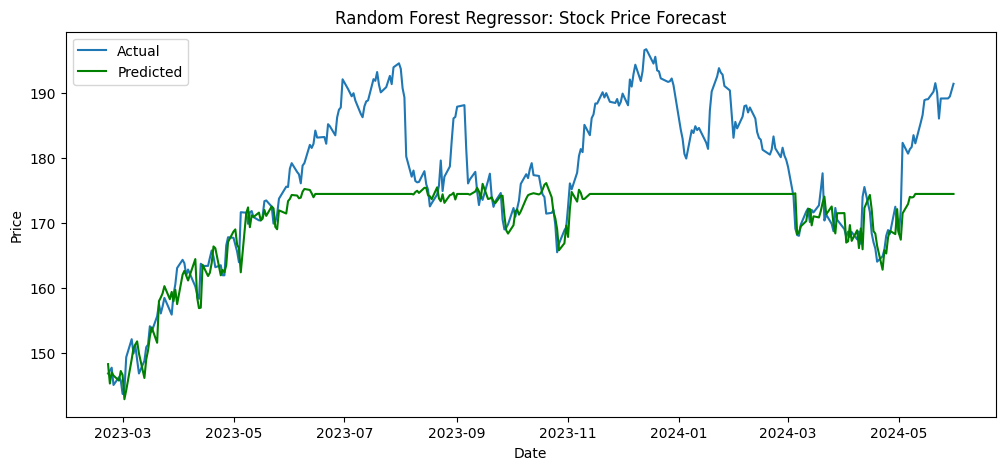

In [11]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', color='green')
plt.title('Random Forest Regressor: Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Summary